# Bike Dataset Exploration

## by Noureddine Ettayyeby

## Preliminary Wrangling

In this project, I choose the 2019 Bike data set which I download and wrangle it to have 13 columns and around half a million rows, but for the propose of this project, I am going to reduce the data to focus on the 25 most commun start station in the dataset which reduces the amount of the data I am going to analyze to about 200K rows.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#load the dataset
bike_data = pd.read_csv('bike_2019_data.csv')

In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473334 entries, 0 to 473333
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               473334 non-null  int64  
 1   Unnamed: 0.1             473334 non-null  int64  
 2   duration_sec             473334 non-null  int64  
 3   start_time               473334 non-null  object 
 4   end_time                 473334 non-null  object 
 5   start_station_id         473334 non-null  float64
 6   start_station_name       473334 non-null  object 
 7   start_station_latitude   473334 non-null  float64
 8   start_station_longitude  473334 non-null  float64
 9   end_station_id           469745 non-null  float64
 10  end_station_name         469839 non-null  object 
 11  end_station_latitude     473334 non-null  float64
 12  end_station_longitude    473334 non-null  float64
 13  bike_id                  473334 non-null  int64  
 14  user

In [4]:
bike_data = bike_data[:int(bike_data.shape[0] *.6)]

In [5]:
bike_data.to_csv('bike_2019_data.csv')

In [5]:
bike_data.start_time = pd.to_datetime(bike_data.start_time)

In [4]:
# select the 15 most commun station 
start_station = bike_data.start_station_name.value_counts()[:15].index

In [5]:
# reduce the data 
bike_data = bike_data[bike_data.start_station_name.isin(start_station)]

In [6]:
bike_data.drop(columns=['Unnamed: 0'], inplace=True)

### What is the structure of your dataset?

<p> The data set I am going to work with has about 200k rows and 13 columns which have information about the trip length and start time, end time, and also start station, end station...
</p>

### What is/are the main feature(s) of interest in your dataset?

<p>The main feature in the data set is the length of the trip and the type of user. </p>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

<p>I think that the start time of the trip will be helpful to understand the relationship between length and the type of user and also the relationship between the time of the trip and types of user</p>

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

<p>Let's start by taking a look at the type of user column in the dataset, what is the most commun user type? </p>

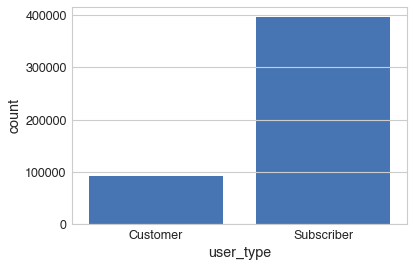

In [7]:
# user's type 
base_color = sb.color_palette()[0]
sb.countplot(bike_data.user_type, color=base_color);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

<p>This plot shows that most of the users are subscribers with the company, some questions will be who take longer trips, customer or subscriber, is the type of customer always less frequent?</p>

#### Trip Duartion distrubtion 

<p>In the next cell, I will plot the distribution of the duration column.</p>

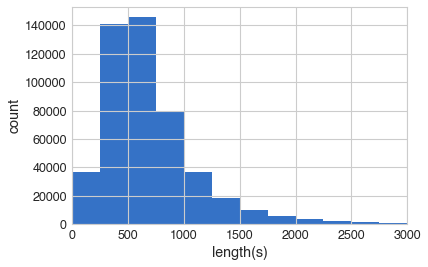

In [8]:
bins_edge = np.arange(0, bike_data.duration_sec.max() + 250, 250)
plt.hist(bike_data.duration_sec, bins=bins_edge);
plt.xlim(0, 3000);
plt.xlabel('length(s)');
plt.ylabel('count');

<p> The distribution of the duration column is skewed to the right which is expected, Most of the trips have a length under 1000 secondes with some large outliers, but most of the length of the trips fell between 0 and 3000 seconds.</p>

### Start station 

<p> Now I am going to take a look at where the trips start and how they are distributed across the 15 different stations.</p>

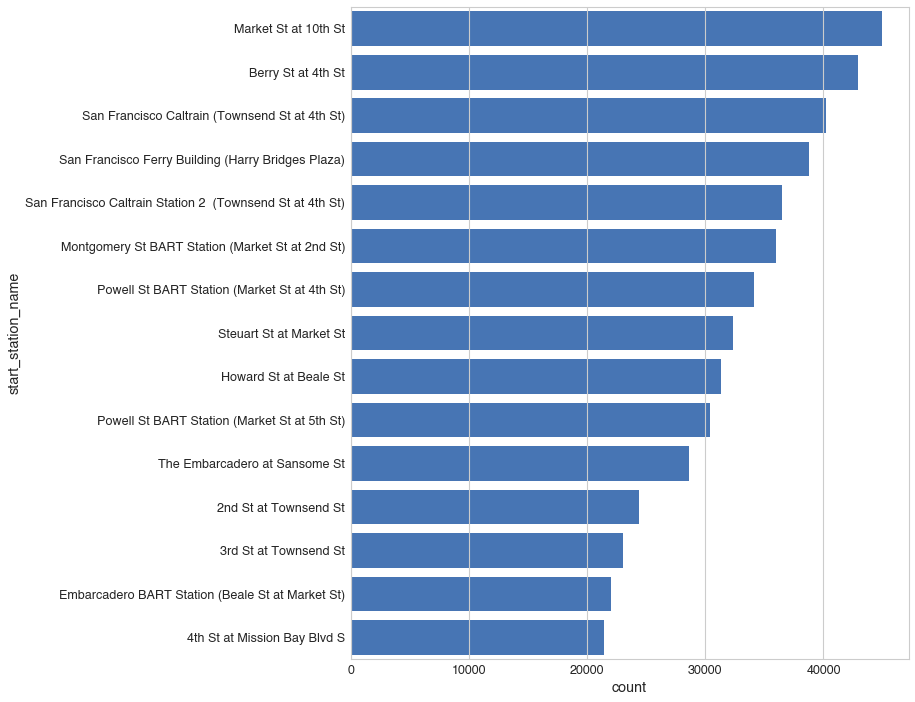

In [43]:
plt.figure(figsize=(10, 12))
station_order = bike_data.start_station_name.value_counts().index
sb.countplot(data=bike_data, y='start_station_name', color=base_color, order=station_order);
plt.savefig('station.png')

<p> This plot shows there some station more frequent than others and there is a huge difference between the most frequent and the least frequent. </p>

### Trip time

In [10]:
bike_data.start_time = pd.to_datetime(bike_data.start_time)
bike_data.end_time = pd.to_datetime(bike_data.end_time)

In [11]:
# A function to add a column to the data frame specifiyng the period of the day the trip was started 
def day_period(data):
    if data + 1 >= 6 and data + 1 < 12:
        return 'Morning'
    elif data + 1 >= 12 and data + 1 < 14:
        return 'Mid-day'
    elif data + 1 >= 14 and data + 1 < 18:
        return 'Afternoon'
    elif data + 1 >= 18 and data + 1 < 22:
        return 'Evening'
    else:
        return 'Night'

In [12]:
bike_data['day_period'] = bike_data.start_time.dt.hour.apply(day_period)

In [13]:
bike_data.day_period.value_counts()

Morning      175940
Evening      160009
Afternoon     95790
Mid-day       34480
Night         22232
Name: day_period, dtype: int64

In [14]:

bike_data['month'] = bike_data.start_time.dt.strftime('%b')

In [15]:
bike_data.month.value_counts()

Mar    51097
Apr    49438
Jul    44717
Aug    44515
Oct    44157
Jun    41830
Jan    40826
Sep    39851
May    38817
Feb    37369
Nov    32992
Dec    22842
Name: month, dtype: int64

In [16]:
bike_data['day'] = bike_data.start_time.dt.day_name()

In [17]:
bike_data.day.value_counts()

Tuesday      90437
Thursday     88886
Wednesday    87682
Monday       84619
Friday       80415
Saturday     30276
Sunday       26136
Name: day, dtype: int64

#### Number of  Trips by day period

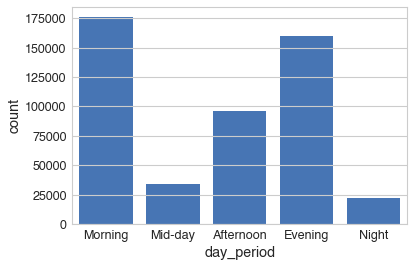

In [18]:
# plot the start of trips based on the day period column
period_order = ['Morning', 'Mid-day', 'Afternoon', 'Evening', 'Night']
sb.countplot(data=bike_data, x='day_period', order=period_order, color=base_color);


<p> In this plot, I see that a large portion of the trip was in the morning and the evening period is a close second, on the other hand, there are few trips done by night.</p>

#### Number of  Trips by day of the week 

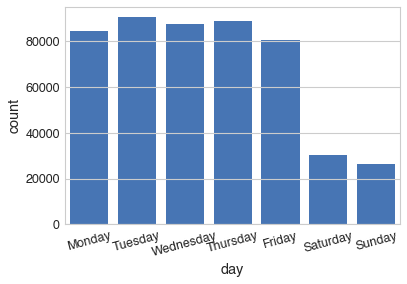

In [19]:
# plot the distrbtion of the start time through out the week 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=bike_data, x='day', order=days, color=base_color);
plt.xticks(rotation=15);

<p> This plot shows that most of the weekdays have almost the same amount of trips, but on the weekends the number of trips drops significantly <p>

#### Number of  Trips by months

In [20]:
bike_data.month.value_counts()

Mar    51097
Apr    49438
Jul    44717
Aug    44515
Oct    44157
Jun    41830
Jan    40826
Sep    39851
May    38817
Feb    37369
Nov    32992
Dec    22842
Name: month, dtype: int64

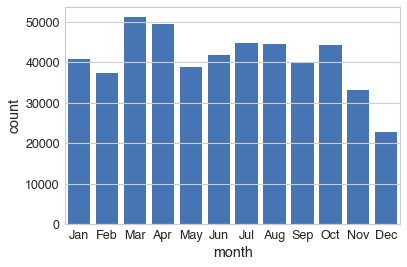

In [21]:
# plot the number of trip start by each month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sb.countplot(data=bike_data, x='month', order=months, color=base_color);

<p>This plot shows that Mars and April have the largest trips, and December has the fewest trips, but generally, all other months have more or less the same of trips.</p>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


<p> In this section, I plotted six different distribution The first was the user type which indicates that most users are subscribers, The second plot was the distribution of the duration of the trip, this plot shows that most of the trips have a length below 1000(s). After that, I plotted the distribution of the trip by the starting station. Then I plotted the distribution of starting time of trips on the period of the day, day of the week, and month.</p>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

<p>One curious thing is that there are few trips in December, and a few trips at the weekend, also there is a huge difference between the most commun starting stations and the least commun. For the distribution of the starting time, I had to create three new columns from the start time column. </p>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Trip length and user type

<p> Which type of user has the longest trips? </p>

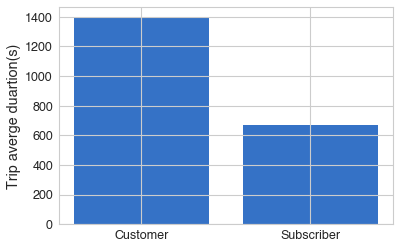

In [22]:
#plot the averge trip for each type of users
plt.bar(bike_data.groupby('user_type')['duration_sec'].mean().index, bike_data.groupby('user_type')['duration_sec'].mean());
plt.ylabel('Trip averge duartion(s)');

<p>Interestingly, this plot shows that customers take a lot longer trips then subscribers, the average duration for a customer is around 1400(s), whereas the average trip taken by a subscriber is around just 600s.</p>

In [23]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,day_period,month,day
0,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,Afternoon,Jan,Thursday
1,731,2019-01-31 23:46:39.438,2019-01-31 23:58:50.494,81.0,Berry St at 4th St,37.775880,-122.393170,323.0,Broadway at Kearny,37.798014,-122.405950,5480,Subscriber,Night,Jan,Thursday
2,1485,2019-01-31 23:29:49.689,2019-01-31 23:54:35.139,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,5193,Subscriber,Night,Jan,Thursday
3,129,2019-01-31 23:43:23.063,2019-01-31 23:45:32.528,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,22.0,Howard St at Beale St,37.789756,-122.394643,1195,Subscriber,Night,Jan,Thursday
5,266,2019-01-31 23:34:32.706,2019-01-31 23:38:59.059,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,323.0,Broadway at Kearny,37.798014,-122.405950,4778,Subscriber,Night,Jan,Thursday


#### Get rid of large outliers 

In [24]:
(bike_data.duration_sec < 10000).sum()

487051

In [25]:
bike_data = bike_data[bike_data.duration_sec < 10000]

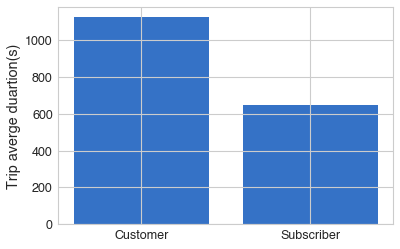

In [26]:
plt.bar(bike_data.groupby('user_type')['duration_sec'].mean().index, bike_data.groupby('user_type')['duration_sec'].mean());
plt.ylabel('Trip averge duartion(s)');

<p>
When I get rid of the outliers I see that the average trip length for the customer type has dropped but the subscriber type remains unchanged. </p>

### day period and trip's length

<p>How the trip length distributed for each period of the day?</p>

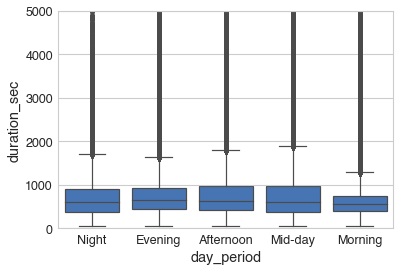

In [27]:
plt.figur
sb.boxplot(data=bike_data, x='day_period', y='duration_sec', color=base_color);
plt.ylim(0, 5000);

<p> People who take a trip in the middle of the day tend to take a longer trip on average, on the other hand, trips taken in the morning or evening are shorter than all other periods of the day. </p>

### Day and trip's length

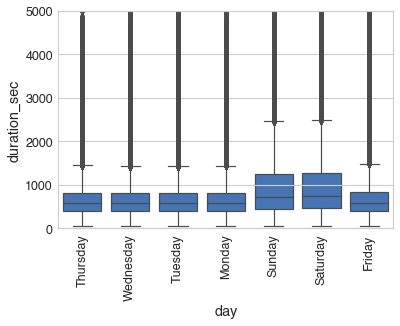

In [28]:
sb.boxplot(data=bike_data, x='day', y='duration_sec', color=base_color);
plt.ylim(0, 5000);
plt.xticks(rotation=90);

<p> In this plot Trips  on the weekend are on average  longer than the trips taken on the weekdays.</p>

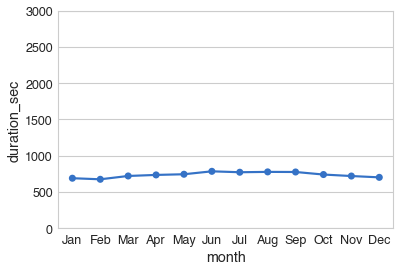

In [29]:
sb.pointplot(data=bike_data, x='month', y='duration_sec', color=base_color);
plt.ylim(0, 3000);

<p> Trips taken in the period between July and September are the longest and generally trips in the summer are longer than the trips taken in the autumn or early winter. </p> 

#### User type and trip start time

How user types and trip start time relate to each other?

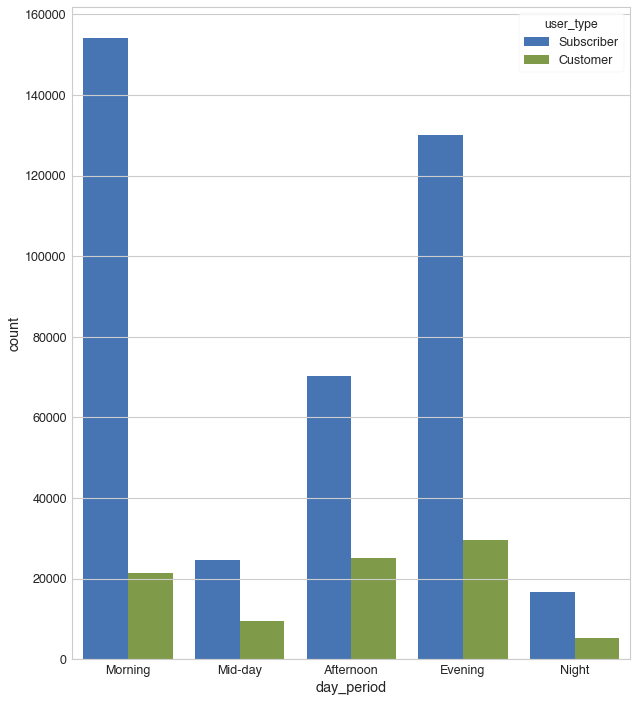

In [50]:
plt.figure(figsize=(10, 12))
sb.countplot(data=bike_data, x='day_period', hue='user_type', order=period_order);
plt.savefig('day-period.png')

<p>Throughout the day subscriber use the services more than customers, but I see a little surge in the afternoon for the number of customers. </p>

#### Trip start day

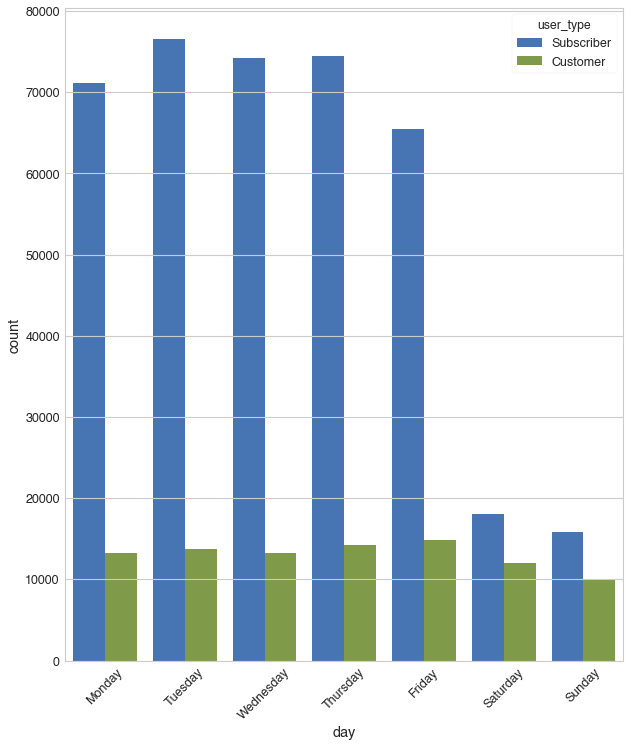

In [48]:
plt.figure(figsize=(10, 12))
sb.countplot(data=bike_data, x='day', hue='user_type', order=days);
plt.xticks(rotation=45);
plt.savefig('day-trips.png')

<p>Throughout the week the number of subscribers who use the service is larger than the number of customers.</p> 

#### Trip start month and user type

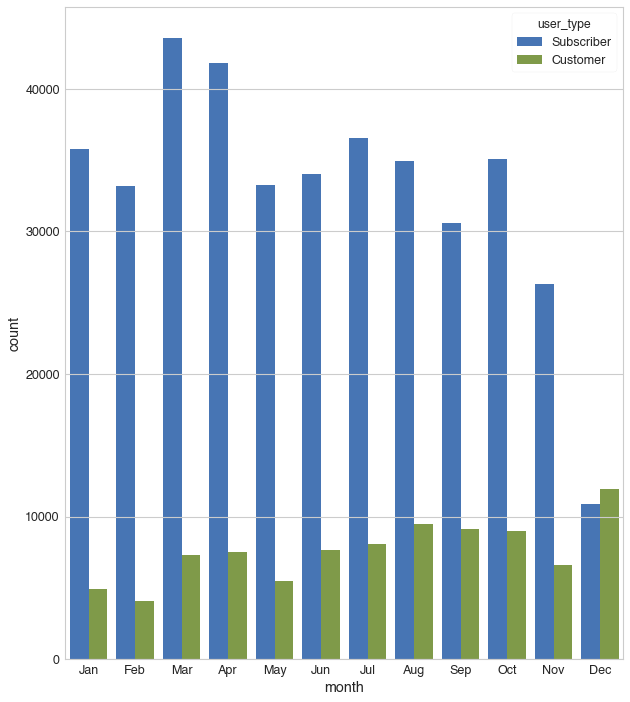

In [47]:
plt.figure(figsize=(10, 12))
sb.countplot(data=bike_data, x='month', hue='user_type', order=months);
plt.savefig('month-trips.png')

<p> In most months the number of subscribers who are using the service is a lot larger than the number of customers, except in December where the Number of customers is a little bit more than the number of subscribers.<p>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<p>In this section, I first explored the relationship between the type of user and the length of trips and I discovered that customer tends to take a lot longer trips then subscribers, I also looked at the relationship between the time of the trips in the day, days of the week, month and the length of the trips, and found that the trips were taken in the Mid_day period and the afternoon is on average longer than other periods of the day, As of the day of the week I saw that the weekend's trips are a lot longer than the week das trips, for months the summer's trips are on average longer than autumn's trips.</p>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

<p> In this section also I investigated the relationship between the trip's time and the type of user and found that most of the time the number of subscribers is larger than the number of customers although there is some trends for example in the afternoon we see a little surge in the number customer, also we see a surge in the number of customer in the summer's months, and surprisingly the number of customers exceeds the number of subscribers in the month of December. </p>

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### day period, trip length and user type

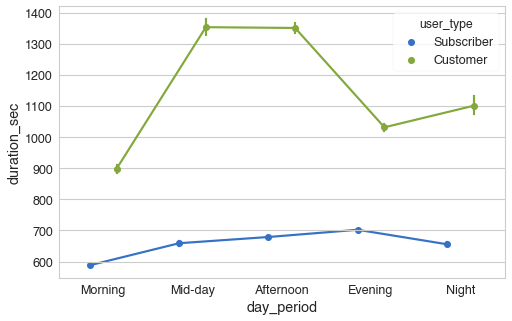

In [33]:
plt.figure(figsize=(8, 5))
sb.pointplot(data=bike_data, x='day_period', y='duration_sec', hue='user_type', \
             dodge=.3, order=period_order, linestyles='-');

This plot shows subscribers tend to take longer trips in the afternoon and evening and shorter trips in the morning, where Customers take longer trips in Midday and evening and shorter trips in the Morning.

### day, trip length, and user type

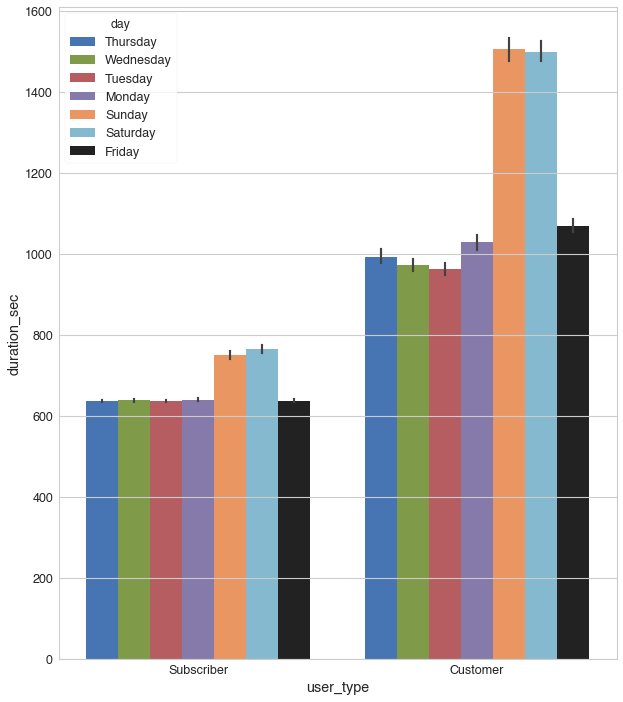

In [44]:
plt.figure(figsize=(10, 12))
sb.barplot(data=bike_data, x='user_type', y='duration_sec', hue='day');
plt.savefig('day-trips.png')

This plot shows that Customers and subscribers alike tend to take longer trips on the weekends compared to the weekdays, 

### Month ,  trip length and user type

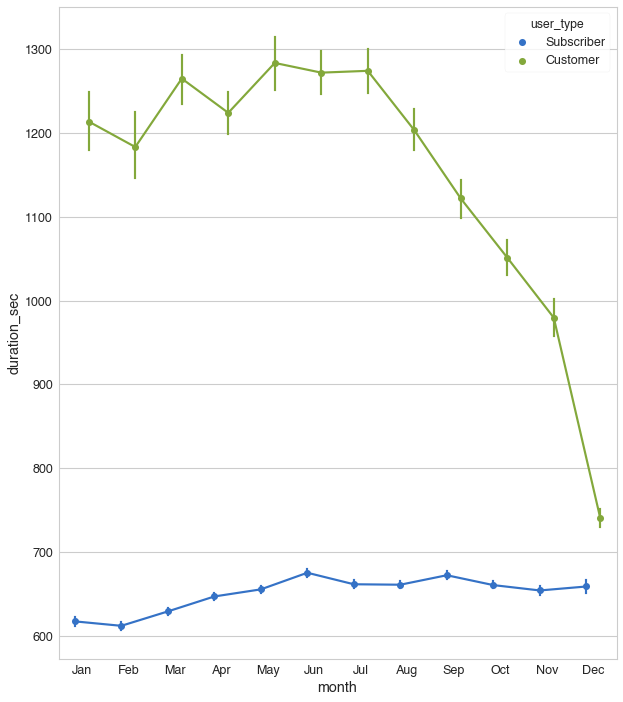

In [45]:
plt.figure(figsize=(10, 12))
sb.pointplot(data=bike_data, x='month', y='duration_sec', hue='user_type', \
             dodge=.3, order=months, linestyles='-');
plt.savefig('trip-length.png')

This plot shows that customers take longer trips June and September, also there is a clear spike in the summer months. As for Customers they tend to take longer trips in June and August, there is also not much variation between January and July, but after that, there is a huge decline until the end of the year.

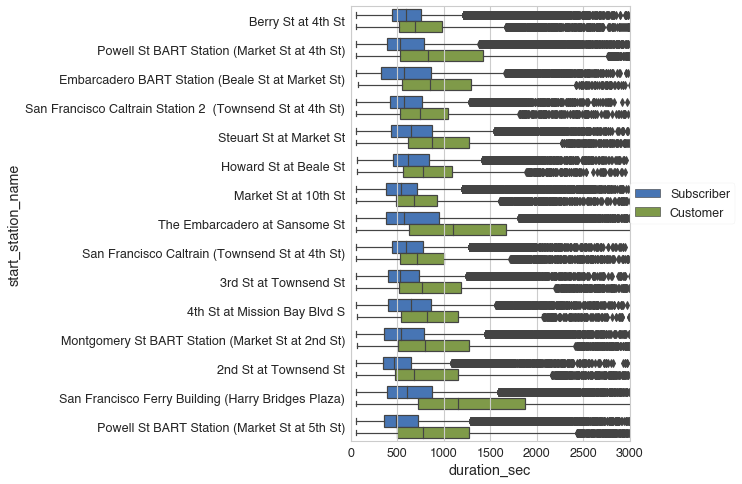

In [36]:
plt.figure(figsize=(5, 8));
sb.boxplot(data=bike_data, x='duration_sec', y='start_station_name', hue='user_type');
plt.xlim(0, 3000);
plt.legend(loc=(1, .5));

Where ever the trips start I see that customers take longer trips than subscribers, but in some stations, they take a lot longer trips.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<p>In this section, I observed that the length of trip depend on the customer and the period of the day since customer take longer trips in the Mid _day and the afternoon periods on the other hand subscribers take longer tris in the Mid_day and evening periods. As of the day of the week, I saw that customers and subscribers alike take longer trips on the weekends. For the months the customers and subscribers differ a bit, customers tend to take longer trips between January and July but after that and until the end of the year there is huge drop int the length of the trips, for subscribers, there is not much variation but they tend to take longer trips in July and September.   </p>

### Were there any interesting or surprising interactions between features?

<p>The interesting parts in this section are the drops in the length of trips for customers in the evening for the day periods and from July until the end of the year for the months periods</p>